In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv("/Users/suching/Github/vae/results/csv/baseline_500_results.csv")
df = df[['metric_best_validation_accuracy', 'env_CLASSIFIER', 'env_SEED', 'Task_Name', 'Experiment_ID', 'Task_ID']].dropna()

In [18]:
df.shape

(291, 6)

In [19]:
df.groupby("env_CLASSIFIER").metric_best_validation_accuracy.std()

env_CLASSIFIER
boe     0.013281
cnn     0.094910
lr      0.008027
lstm    0.093124
Name: metric_best_validation_accuracy, dtype: float64

In [20]:
df.groupby("env_CLASSIFIER").count()['env_SEED']

env_CLASSIFIER
boe     59
cnn     90
lr      85
lstm    57
Name: env_SEED, dtype: int64

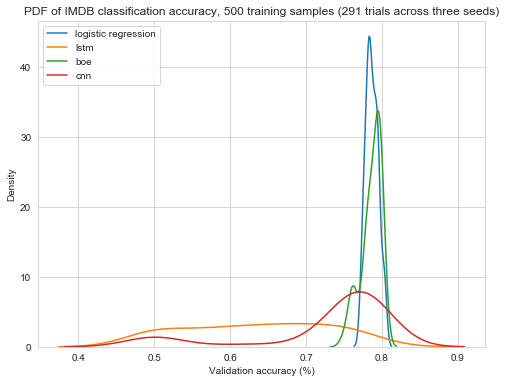

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df.loc[df['env_CLASSIFIER'] == 'lr']['metric_best_validation_accuracy'].dropna(), hist=False, norm_hist=True, label='logistic regression')
sns.distplot(df.loc[df['env_CLASSIFIER'] == 'lstm']['metric_best_validation_accuracy'].dropna(),hist=False, norm_hist=True,label='lstm')
sns.distplot(df.loc[df['env_CLASSIFIER'] == 'boe']['metric_best_validation_accuracy'].dropna(), hist=False, norm_hist=True,label='boe')
sns.distplot(df.loc[df['env_CLASSIFIER'] == 'cnn']['metric_best_validation_accuracy'].dropna(), hist=False, norm_hist=True, label='cnn')
ax.set_title("PDF of IMDB classification accuracy, 500 training samples (291 trials across three seeds)")
ax.set_ylabel("Density")
ax.set_xlabel("Validation accuracy (%)")
fig.savefig("/Users/suching/Github/vae/results/png/baseline_500_results.png", dpi=300)